# Genre Classification 

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

## Preprocessing data

In [154]:
# Load the dataset and print out first 5 lines of the dataset
df = pd.read_csv('Data/features_30_sec.csv')
df.head()

,filename,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,tempo,mfcc1_mean,mfcc2_mean,...,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean,label
0,blues.00000.wav,0.350088,0.130228,1784.165850,2002.449060,3805.839606,0.083045,123.046875,-113.570648,121.571793,...,8.803792,-3.672300,5.747995,-5.162882,0.752740,-1.690215,-0.408979,-2.303523,1.221291,blues
1,blues.00001.wav,0.340914,0.095948,1530.176679,2039.036516,3550.522098,0.056040,67.999589,-207.501694,123.991264,...,5.376327,-2.231760,4.220140,-6.012148,0.927998,-0.731125,0.295073,-0.283518,0.531217,blues
2,blues.00002.wav,0.363637,0.175570,1552.811865,1747.702312,3042.260232,0.076291,161.499023,-90.722595,140.446304,...,5.791199,-8.907628,-1.077000,-9.229274,2.451690,-7.729093,-1.816407,-3.439720,-2.231258,blues
3,blues.00003.wav,0.404785,0.141093,1070.106615,1596.412872,2184.745799,0.033309,63.024009,-199.544205,150.090897,...,6.079319,-2.480174,-1.079305,-2.870789,0.780874,-3.319597,0.636965,-0.619121,-3.407448,blues
4,blues.00004.wav,0.308526,0.091529,1835.004266,1748.172116,3579.757627,0.101461,135.999178,-160.337707,126.219635,...,-2.813867,-6.933385,-7.552725,-9.164666,-4.520576,-5.454034,-0.916874,-4.404827,-11.703234,blues


In [155]:
# Display the columns
df.columns

Index(['filename', 'chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean',
       'spectral_bandwidth_mean', 'rolloff_mean', 'zero_crossing_rate_mean',
       'tempo', 'mfcc1_mean', 'mfcc2_mean', 'mfcc3_mean', 'mfcc4_mean',
       'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean', 'mfcc9_mean',
       'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean', 'mfcc13_mean',
       'mfcc14_mean', 'mfcc15_mean', 'mfcc16_mean', 'mfcc17_mean',
       'mfcc18_mean', 'mfcc19_mean', 'mfcc20_mean', 'label'],
      dtype='object')

In [156]:
# Display the number of music each genre contains
df.label.value_counts()

classical    100
disco        100
jazz         100
metal        100
country      100
rock         100
hiphop       100
blues        100
reggae       100
pop          100
Name: label, dtype: int64

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   chroma_stft_mean         1000 non-null   float64
 2   rms_mean                 1000 non-null   float64
 3   spectral_centroid_mean   1000 non-null   float64
 4   spectral_bandwidth_mean  1000 non-null   float64
 5   rolloff_mean             1000 non-null   float64
 6   zero_crossing_rate_mean  1000 non-null   float64
 7   tempo                    1000 non-null   float64
 8   mfcc1_mean               1000 non-null   float64
 9   mfcc2_mean               1000 non-null   float64
 10  mfcc3_mean               1000 non-null   float64
 11  mfcc4_mean               1000 non-null   float64
 12  mfcc5_mean               1000 non-null   float64
 13  mfcc6_mean               1000 non-null   float64
 14  mfcc7_mean               

In [158]:
# Check whether there is null value in the array
df.isnull().sum()

filename                   0
chroma_stft_mean           0
rms_mean                   0
spectral_centroid_mean     0
spectral_bandwidth_mean    0
rolloff_mean               0
zero_crossing_rate_mean    0
tempo                      0
mfcc1_mean                 0
mfcc2_mean                 0
mfcc3_mean                 0
mfcc4_mean                 0
mfcc5_mean                 0
mfcc6_mean                 0
mfcc7_mean                 0
mfcc8_mean                 0
mfcc9_mean                 0
mfcc10_mean                0
mfcc11_mean                0
mfcc12_mean                0
mfcc13_mean                0
mfcc14_mean                0
mfcc15_mean                0
mfcc16_mean                0
mfcc17_mean                0
mfcc18_mean                0
mfcc19_mean                0
mfcc20_mean                0
label                      0
dtype: int64

In [159]:
name = df['label'].unique()

In [160]:
name 

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [161]:
# Transform the genre type to integers
df['label'] = df['label'].astype('category')
df['label'] = df['label'].cat.codes

In [162]:
df['label'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [163]:
lookup_genre_name = dict(zip(df.label.unique(), name))   
lookup_genre_name

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [166]:
print(len(cols))

29


In [167]:
df.head()

,filename,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,tempo,mfcc1_mean,mfcc2_mean,...,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean,label
0,blues.00000.wav,0.350088,0.130228,1784.165850,2002.449060,3805.839606,0.083045,123.046875,-113.570648,121.571793,...,8.803792,-3.672300,5.747995,-5.162882,0.752740,-1.690215,-0.408979,-2.303523,1.221291,0
1,blues.00001.wav,0.340914,0.095948,1530.176679,2039.036516,3550.522098,0.056040,67.999589,-207.501694,123.991264,...,5.376327,-2.231760,4.220140,-6.012148,0.927998,-0.731125,0.295073,-0.283518,0.531217,0
2,blues.00002.wav,0.363637,0.175570,1552.811865,1747.702312,3042.260232,0.076291,161.499023,-90.722595,140.446304,...,5.791199,-8.907628,-1.077000,-9.229274,2.451690,-7.729093,-1.816407,-3.439720,-2.231258,0
3,blues.00003.wav,0.404785,0.141093,1070.106615,1596.412872,2184.745799,0.033309,63.024009,-199.544205,150.090897,...,6.079319,-2.480174,-1.079305,-2.870789,0.780874,-3.319597,0.636965,-0.619121,-3.407448,0
4,blues.00004.wav,0.308526,0.091529,1835.004266,1748.172116,3579.757627,0.101461,135.999178,-160.337707,126.219635,...,-2.813867,-6.933385,-7.552725,-9.164666,-4.520576,-5.454034,-0.916874,-4.404827,-11.703234,0


In [168]:
X = df.iloc[:,1:28]
y = df['label']

In [169]:
# Splitting the dataset to training dataset and testing dataset
# Scale the dataset
scaler = MinMaxScaler()
x= scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=3)

## Feature importance using Random Forest

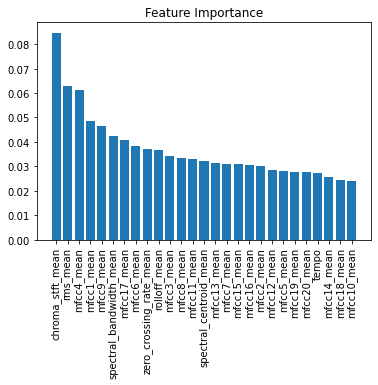

In [170]:
# Ranking the feature through random forest classifier
clf = RandomForestClassifier(random_state=10, n_jobs=-1).fit(X_train_scaled, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

In [171]:
indices

array([ 0,  1, 10,  7, 15,  3, 23, 12,  5,  4,  9, 14, 17,  2, 19, 13, 21,
       22,  8, 18, 11, 25, 26,  6, 20, 24, 16])

## Feature importance using Decision Tree

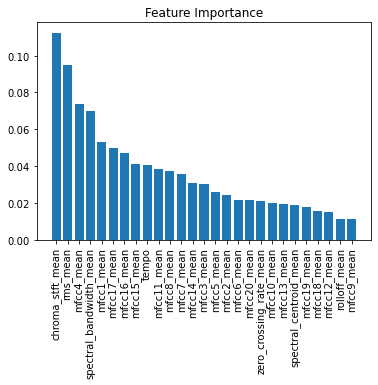

In [172]:
# Ranking the feature through decision tree classifier
clf = DecisionTreeClassifier(random_state=0).fit(X_train_scaled, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]),importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

## KNN ALGORITHM

In [173]:
knn = KNeighborsClassifier()

In [174]:
nei=[]
for i in range (0,21):
  nei.append(i)

In [175]:
grid_params={'n_neighbors':nei, 
             'weights':['uniform','distance'],
             'metric':['euclidean','manhattan']}

In [176]:
gs_knn=GridSearchCV(knn,
                grid_params,
                verbose=1,
                cv=5,
                n_jobs=-1)


In [177]:
gs_knn_final=gs_knn.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


In [178]:
gs_knn_final.best_params_


{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

In [179]:
# The parameters of KNN classifier will be decided by the above result. 
knn_ = KNeighborsClassifier(n_neighbors=3,
                           metric='manhattan',
                           weights='distance')
knnf=knn_.fit(X_train_scaled, y_train)
knn_accuracy=knnf.score(X_test_scaled, y_test)

In [180]:
y_pred = knnf.predict(X_test_scaled)

In [181]:
print("Accuracy (KNN) = ",knn_accuracy*100,"%")

Accuracy (KNN) =  63.63636363636363 %


In [182]:
X_test_scaled[0]

array([0.53835313, 0.22507555, 0.49007467, 0.43636051, 0.47926517,
       0.51461738, 0.4125    , 0.77178628, 0.46940279, 0.23189897,
       0.70769004, 0.47370033, 0.77737974, 0.347598  , 0.70709923,
       0.321479  , 0.88856069, 0.34404805, 0.65671408, 0.19198068,
       0.38407827, 0.28222334, 0.96445684, 0.40995048, 0.59244098,
       0.22991046, 0.48122673])

## Support Vector Machine

In [183]:
from sklearn.svm import SVC

In [184]:
svm=SVC()
c=range(1,10)
grid_params={'kernel':['linear','poly', 'rbf', 'sigmoid'],
             'C':c,
             'degree':[1,2,3,4,5],
             'gamma':['scale','auto']}

In [185]:
gs_svm=GridSearchCV(svm,
                grid_params,
                verbose=1,
                cv=5,
                n_jobs=-1)

In [186]:
gs_svm_final=gs_svm.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


In [187]:
gs_svm_final.best_params_

{'C': 6, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [188]:
# The parameters of SVM will be decided by the above result. 
clf_ = SVC(kernel = 'rbf', C=7,degree=1,gamma='scale')
clff=clf_.fit(X_train_scaled, y_train)
svm_accuracy=clff.score(X_test_scaled, y_test)

In [189]:
y_pred = clff.predict(X_test_scaled)

In [315]:
print("Accuracy(SVM) = ",svm_accuracy * 100,"%")

Accuracy(SVM) =  72.12121212121212 %


In [316]:
!pip install librosa
import librosa

In [317]:
def testfile(filename):


    y, sr = librosa.load(filename)
    #fetching tempo

    onset_env = librosa.onset.onset_strength(y, sr)
    tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)

    #fetching beats

    y_harmonic, y_percussive = librosa.effects.hpss(y)
    tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)

    #chroma_stft

    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)

    #rmse

    rmse = librosa.feature.rms(y=y)

    #fetching spectral centroid

    spec_centroid = librosa.feature.spectral_centroid(y, sr=sr)[0]

    #spectral bandwidth

    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

    #fetching spectral rolloff

    spec_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]

    #zero crossing rate

    zero_crossing = librosa.feature.zero_crossing_rate(y)

    #mfcc

    mfcc = librosa.feature.mfcc(y=y, sr=sr)

    #metadata dictionary

    metadata_dict = {'tempo':tempo,'chroma_stft':np.mean(chroma_stft),'rmse':np.mean(rmse),
                     'spectral_centroid':np.mean(spec_centroid),'spectral_bandwidth':np.mean(spec_bw), 
                     'rolloff':np.mean(spec_rolloff), 'zero_crossing_rates':np.mean(zero_crossing)}

    for i in range(1,21):
        metadata_dict.update({'mfcc'+str(i):np.mean(mfcc[i-1])})

    return list(metadata_dict.values())

In [344]:
file = ["test1_h.wav"]

In [345]:
a = []
for i in file:
    a.append(testfile(i))

In [346]:
def vote_pred(data1):
  
    #Predicting Using KNN
    genre_prediction = knnf.predict(data1)
    pred_knn=genre_prediction[0]
#     print(pred_knn)
    #Predicting Using SVM
    genre_prediction = clff.predict(data1)
    pred_svm=genre_prediction[0]
#     print(pred_svm)
    vote=[0,0,0,0,0,0,0,0,0,0]
    vote[pred_knn]=vote[pred_knn]+knn_accuracy
    vote[pred_svm]=vote[pred_svm]+svm_accuracy
#     print(vote)
    max=0
    for i in range (0,10):
        if vote[i]>max:
            max=i
    return max

In [347]:
for i in a:
    d1 =np.array(i)
    data1 = scaler.transform([d1])
    print(lookup_genre_name[vote_pred(data1)])

hiphop
